Modelo de previsão persistente
=

O modelo de previsão persistente determina que a potência no próximo momento temporal será igual à potência no momento temporal atual, de forma que:

$$ \hat{P}_{t+1} = P_{t} $$

De forma geral, o modelo persistente apresenta melhor performance em horizontes temporais pequenos (5 min, 10 min, 15 min), onde, normalmente, há pequena variação da potência gerada. Quanto maior o horizonte temporal da previsão, menor a capacidade de previsão do modelo persistente.

Avaliação da performance
=

Existem diversas ferramentas estatísticas para avaliar a performance do modelo. Aqui, será utilizada a raiz do erro quadrático médio ou root mean squared error (RMSE).

$$ RMSE = \sqrt{\frac{1}{N}\sum_{t=1}^{t=N} (P_{t} - \hat{P}_{t})^2 } $$

onde $N$ é a quantidade de valores medidos, $P_{t}$ são as medições de potência no momento $t$, e $\hat{P}_{t}$ são as previsões de potência para o momento $t$.

Implementação do modelo persistente em octave
=

In [1]:
pkg load dataframe

In [2]:
data_path = 'PV_12kW.csv';
data_dataframe = dataframe(data_path);
#transformando o dataframe em vetor contendo apenas os dados de energia
energy_data = str2double(data_dataframe.array(1:5000,2));

In [3]:
horizonte_de_previsao = 1*12;

In [4]:
#tornando os dados NaN em 0
for i = 1:size(energy_data)(1)
    if isnan(energy_data(i))
        energy_data(i) = 0;
    endif
endfor

In [5]:
# A função persistente gera uma matrix nxm, em que n é o tamanho do vetor data e m é o horizonte de previsao;
# Cada coluna m apresenta o vetor data com um avanço de fase de m*t
function prev = persistente(data,horizonte_de_previsao)
    prev = [];
    
    for i = 1:horizonte_de_previsao
        prev(:,i) = [zeros(i,1);data(1:end-i)];
    endfor
    
    return;
endfunction

In [6]:
function RMSE = calc_RMSE(data1,data2)
    N = size(data1)(1);
    er_sqrd = (data1 - data2).^2;
    mse = sum(er_sqrd)/N;
    RMSE = sqrt(mse);
    return;
endfunction

In [7]:
#Calculando a previsão
prev = persistente(energy_data,horizonte_de_previsao);

In [8]:
#Calculando o RMSE para cada horizonte de previsão
RMSEs = [];
for i = 1:size(prev)(2)
    RMSEs(i) = calc_RMSE(prev(:,i),energy_data);
endfor

Gráficos
=

In [9]:
function plot_prev(real,prev)
    plot(1:size(real)(1),real,"marker",".","markersize",15,"linewidth",1.5,";Potência real;",1:size(prev)(1),prev,"marker",".","markersize",15,"linewidth",1.5,";Potência prevista;");
    xlabel("Intervalos de tempo");
    ylabel("Energia (Wh)");
    title("Gráfico de Potência real x previsão");
endfunction

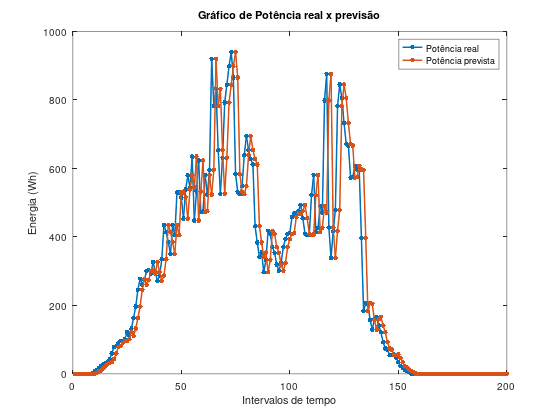

In [26]:
horizonte_para_grafico = 2;
plot_prev(energy_data(1:200),prev(1:200,horizonte_para_grafico))

In [21]:
function plot_rmses(RMSEs)
    plot(1:size(RMSEs)(2),RMSEs,"marker",".","linewidth",1.5,"markersize",15,";RMSE;");    
    xlabel("Horizonte temporal");
    ylabel("RMSE (Wh)");
    title("Gráfico de erro");
endfunction

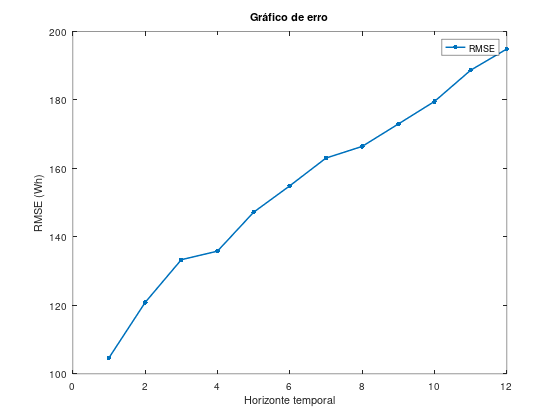

In [23]:
plot_rmses(RMSEs)